In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('Submission.csv')

In [3]:
train.head(2)

,polar_area,amino_acid_count,isoelectric_point,avg_hydrophobicity,binding_volume,hydrophobic_charge_interaction,protein_mass
0,104.666451,1428,7.367834,0.638777,13.545550,13.588728,497.304337
1,105.783410,247,5.765440,0.746038,13.832919,13.458571,364.149915


In [4]:
test.head(2)

,polar_area,amino_acid_count,isoelectric_point,avg_hydrophobicity,binding_volume,hydrophobic_charge_interaction,protein_mass
0,68.356194,651,6.257739,0.657615,6.743080,46.957263,NaN
1,97.566723,622,7.034115,0.597439,20.563718,36.057837,NaN


In [5]:
train.shape, test.shape

((14700, 7), (300, 7))

In [6]:
# lets merge these file
combined = pd.concat([train,test])

In [7]:
combined.head(2)

,polar_area,amino_acid_count,isoelectric_point,avg_hydrophobicity,binding_volume,hydrophobic_charge_interaction,protein_mass
0,104.666451,1428,7.367834,0.638777,13.545550,13.588728,497.304337
1,105.783410,247,5.765440,0.746038,13.832919,13.458571,364.149915


In [8]:
combined.shape

(15000, 7)

In [9]:
# Lets Explore the Data

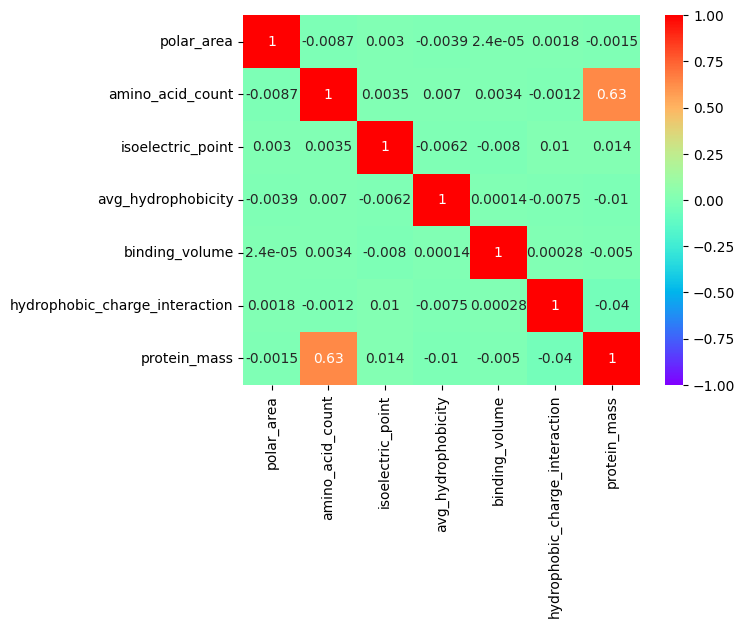

In [10]:
sns.heatmap(combined.corr(),annot=True,vmin=-1,cmap='rainbow')
plt.show()

### Data Preprocessing

In [11]:
# Missing Values
combined.isnull().sum()

polar_area                          0
amino_acid_count                    0
isoelectric_point                   0
avg_hydrophobicity                  0
binding_volume                      0
hydrophobic_charge_interaction      0
protein_mass                      300
dtype: int64

In [12]:
# Outlier treatment

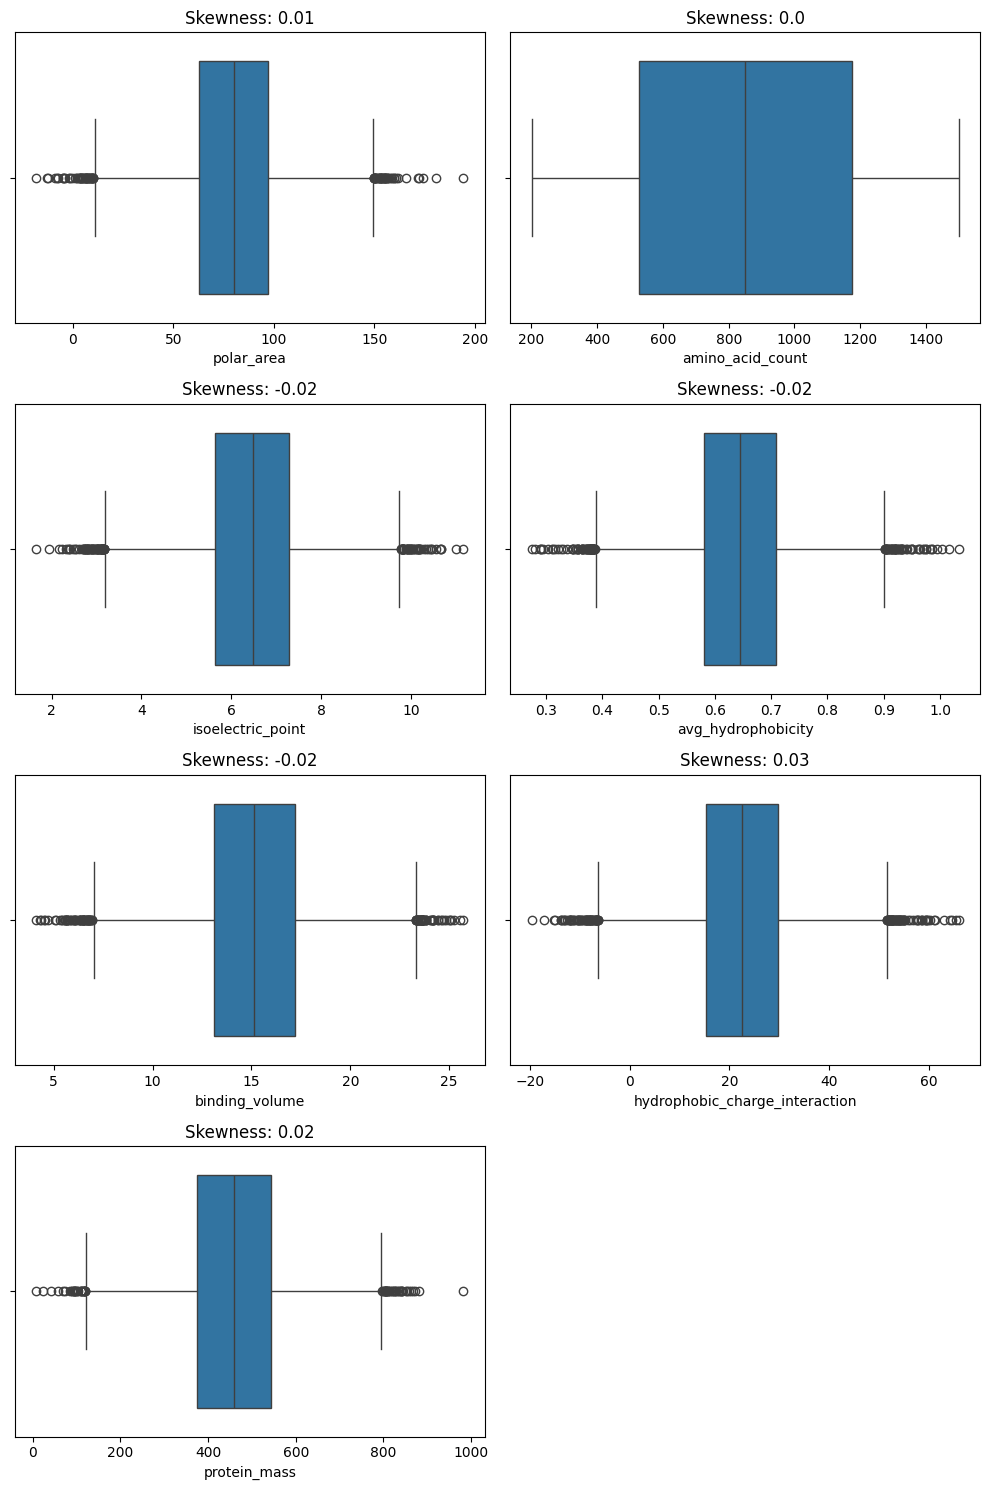

In [13]:
t=1
plt.figure(figsize=(10,15))
for i in train:
    plt.subplot(4,2,t)
    sns.boxplot(data=train,x=i)
    plt.title(f'Skewness: {round(train[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 9.8 MB/s eta 0:00:06
   ---- ----------------------------------- 6.8/56.8 MB 20.8 MB/s eta 0:00:03
   -------- ------------------------------- 11.8/56.8 MB 22.5 MB/s eta 0:00:03
   ------------ --------------------------- 17.8/56.8 MB 24.5 MB/s eta 0:00:02
   ---------------- ----------------------- 23.1/56.8 MB 24.4 MB/s eta 0:00:02
   -------------------- ------------------- 28.6/56.8 MB 24.7 MB/s eta 0:00:02
   ------------------------ --------------- 34.3/56.8 MB 25.2 MB/s eta 0:00:01
   ---------------------------- ----------- 39.8/56.8 MB 25.5 MB/s eta 0:00:01
   -------------------------------- ------- 45.9/56.8 MB 25.9 MB/s eta 0:00:01
   ------------------------------------ --- 51.9/56.8 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 25.6 MB


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Train test split
x = train.drop(columns='protein_mass')
y = train['protein_mass']

x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.80,random_state=2)

In [18]:
x_test = test.drop(columns='protein_mass')

In [19]:
x_test.head(2)

,polar_area,amino_acid_count,isoelectric_point,avg_hydrophobicity,binding_volume,hydrophobic_charge_interaction
0,68.356194,651,6.257739,0.657615,6.743080,46.957263
1,97.566723,622,7.034115,0.597439,20.563718,36.057837


In [20]:
print('Training data: ',x_train.shape,y_train.shape)
print('Validation data: ',x_val.shape,y_val.shape)
print('Prediction data:',x_test.shape)

Training data:  (11760, 6) (11760,)
Validation data:  (2940, 6) (2940,)
Prediction data: (300, 6)


In [21]:
# Linear Regression (Base Model)

In [22]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
pred_lr = model_lr.predict(x_val)
print('TEST SCORES')
print('R2:',r2_score(y_val,pred_lr))
print('RMSE:',mean_squared_error(y_val,pred_lr)**0.5)

TEST SCORES
R2: 0.3902002659512769
RMSE: 95.47795735804931


In [24]:
pred_lr = model_lr.predict(x_train)
print('TRAIN SCORES')
print('R2:',r2_score(y_train,pred_lr))
print('RMSE:',mean_squared_error(y_train,pred_lr)**0.5)

TRAIN SCORES
R2: 0.4060109633650687
RMSE: 94.27936927625498


In [25]:
# KNN

from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train_s = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_val_s = pd.DataFrame(scaler.transform(x_val),columns=x_val.columns)

In [28]:
model_knn = KNeighborsRegressor(n_neighbors=9)

In [29]:
model_knn.fit(x_train_s,y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
pred_lr = model_knn.predict(x_val_s)
print('TEST SCORES')
print('R2:',r2_score(y_val,pred_lr))
print('RMSE:',mean_squared_error(y_val,pred_lr)**0.5)

TEST SCORES
R2: 0.3148894665849119
RMSE: 101.20217033030954


In [31]:
pred_lr = model_knn.predict(x_train_s)
print('TRAIN SCORES')
print('R2:',r2_score(y_train,pred_lr))
print('RMSE:',mean_squared_error(y_train,pred_lr)**0.5)

TRAIN SCORES
R2: 0.46727964337354366
RMSE: 89.2847116050652


In [32]:
# Decision Tree

model_dt = DecisionTreeRegressor(max_depth=4)
model_dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
pred_lr = model_dt.predict(x_val)
print('TEST SCORES')
print('R2:',r2_score(y_val,pred_lr))
print('RMSE:',mean_squared_error(y_val,pred_lr)**0.5)

TEST SCORES
R2: 0.3835860173226714
RMSE: 95.99436601797224


In [34]:
pred_lr = model_dt.predict(x_train)
print('TRAIN SCORES')
print('R2:',r2_score(y_train,pred_lr))
print('RMSE:',mean_squared_error(y_train,pred_lr)**0.5)

TRAIN SCORES
R2: 0.4090910139168623
RMSE: 94.03461506110565


In [35]:
# XGBoost

In [36]:
model_xgb = XGBRegressor(n_estimators=50,max_depth=7,reg_alpha = 1 )

In [37]:
model_xgb.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
pred_lr = model_xgb.predict(x_val)
print('TEST SCORES')
print('R2:',r2_score(y_val,pred_lr))
print('RMSE:',mean_squared_error(y_val,pred_lr)**0.5)

TEST SCORES
R2: 0.3229928416660375
RMSE: 100.601888701787


In [39]:
pred_lr = model_xgb.predict(x_train)
print('TRAIN SCORES')
print('R2:',r2_score(y_train,pred_lr))
print('RMSE:',mean_squared_error(y_train,pred_lr)**0.5)

TRAIN SCORES
R2: 0.7057807831223606
RMSE: 66.35336792904349


In [40]:
# Fine tune the XGB
from sklearn.model_selection import GridSearchCV

In [41]:
grid = {'n_estimators':[40,50,60,75],
       'max_depth':[3,4,5,6],
       'reg_lambda':[6,7,9]}

In [42]:
gscv = GridSearchCV(estimator=XGBRegressor(),param_grid=grid,cv=5,
                   verbose=3,scoring='r2')

In [43]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=3, n_estimators=40, reg_lambda=6;, score=0.387 total time=   0.0s
[CV 2/5] END max_depth=3, n_estimators=40, reg_lambda=6;, score=0.389 total time=   0.0s
[CV 3/5] END max_depth=3, n_estimators=40, reg_lambda=6;, score=0.402 total time=   0.0s
[CV 4/5] END max_depth=3, n_estimators=40, reg_lambda=6;, score=0.407 total time=   0.0s
[CV 5/5] END max_depth=3, n_estimators=40, reg_lambda=6;, score=0.404 total time=   0.0s
[CV 1/5] END max_depth=3, n_estimators=40, reg_lambda=7;, score=0.385 total time=   0.0s
[CV 2/5] END max_depth=3, n_estimators=40, reg_lambda=7;, score=0.391 total time=   0.0s
[CV 3/5] END max_depth=3, n_estimators=40, reg_lambda=7;, score=0.400 total time=   0.0s
[CV 4/5] END max_depth=3, n_estimators=40, reg_lambda=7;, score=0.407 total time=   0.0s
[CV 5/5] END max_depth=3, n_estimators=40, reg_lambda=7;, score=0.402 total time=   0.0s
[CV 1/5] END max_depth=3, n_estimators=40, reg_l

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [40, 50, ...], 'reg_lambda': [6, 7, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [44]:
gscv.best_params_

{'max_depth': 3, 'n_estimators': 40, 'reg_lambda': 9}

In [45]:
gscv.best_score_

np.float64(0.3982386218554046)

In [46]:
model_xgb = XGBRegressor(**gscv.best_params_)

In [47]:
model_xgb.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
model_xgb.score(x_val,y_val)

0.38090388660181784

In [49]:
# Submission

In [50]:
pred = model_xgb.predict(x_test)

In [51]:
submission['protein_mass']=pred

In [52]:
submission.to_csv('final_submission.csv',index=False)